In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Laboratorio 04: Raíces

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

#1
¿Para que ángulo el area del segmento circular es igual a un cuarto del area de una circunferencia?

- Muestre que la expresión que permite resolver este problema será:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- Construya una grafica para $\theta$  ¿Alrededor de que punto esta solución?(Para este punto se recomienda emplear `dataframe`).

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.

#1.
Se tiene que el área de un segmento circular está dada por:

$$ A = \frac{R^2}{2} (x - \sin(x)) $$

El área de una circunferencia está dada por:

$$ A_{\text{circunferencia}} = \pi R^2 $$

Por lo tanto, un cuarto del área es:

$$ \frac{\pi R^2}{4} $$

Igualando ambas expresiones:

$$ \frac{R^2}{2} (x - \sin(x)) = \frac{\pi R^2}{4} $$

Despejando \( x - \sin(x) \), se obtiene finalmente:

$$ x - \sin(x) = \frac{\pi}{2} $$



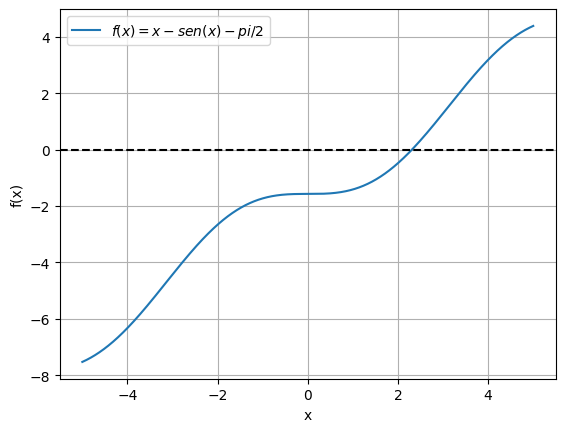

La solución obtenida con el método de bisección es: 2.309881456196308
La raíz obtenida con el método de punto fijo es: 2.309881460010393
La raíz obtenida con el método de Newton es: 2.3098814600100575
La solución obtenida con el método de la secante es: 2.3098814600100575


,x,f(x)
7309,2.309731,-0.000252


In [ ]:

#2. Gráfica de la función
x = np.linspace(-5, 5, 10000)
y = x -np.sin(x) - np.pi/2

plt.plot(x, y, label='$f(x) = x-sen(x) - pi/2$')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

df = pd.DataFrame({'x' : x, 'f(x)' : y})

df_raiz = df[np.abs(df['f(x)'])<0.001]


#3. Método de bisección

f = lambda x : x - np.sin(x) - np.pi/2

def biseccion(f, a, b, tol=1e-8, max_iter=100):
  i = 0
  while i < max_iter:
    c = (a + b)/2
    if f(a)*f(b) > 0:
      raise ValueError('No hay raiz en el intervalo')
    if abs(f(c)) < tol:
      return c
    elif f(c)*f(a) < 0:
      b = c
    else:
      a = c
    i += 1
  raise RuntimeError(f'No se encontró la raíz después de {max_iter} iteraciones')

raiz1 = biseccion(f, 0, 3)
print(f'La solución obtenida con el método de bisección es: {raiz1}')

#punto fijo
'''
Redefiniendo la ecuación queda:
x = sen(x) + (pi/2)
'''

g = lambda x: np.sin(x) + np.pi/2

def puntofijo(g, xo, tol=1e-12, max_n=100):

  xn = xo
  for n in range(max_n):
    xn1 = g(xn)
    if abs(xn1 - xn) < tol:
      return xn1
    xn = xn1

  raise ValueError("El método no convergió después de {} iteraciones".format(max_n))

raiz_2 = puntofijo(g,2.3)
print(f'La raíz obtenida con el método de punto fijo es: {raiz_2}')

#Método de Newton
'''
La derivada de la función es:
1-cos(x)
'''

df = lambda x: 1 - np.cos(x)

def newton(f, df, x0, tol=1e-6, max_n=100):
  for i in range (max_n):
    fx0 = f(x0)
    dfx0 = df(x0)
    if df(x0) == 0:
      raise ValueError('La derivada es cero, no se puede completar el método.')

    x1 = x0 -(fx0 / dfx0)

    if abs(x1 - x0) < tol:
      return x1
    x0 = x1
  raise ValueError('El método no convergió')

raiz3 = newton(f, df, 2)
print(f'La raíz obtenida con el método de Newton es: {raiz3}')

#Método de la secante

def secante (f, x0, x1, tol=1e-12, max_n=100):
  for i in range(max_n):
    fx0 = f(x0)
    fx1 = f(x1)

    if fx1 - fx0 == 0:
      raise ValueError('f(x1) - f(x0) es cero. No se puede continuar')

    x2 = x1 - ((f(x1) * (x1 - x0)) / (fx1 - fx0))

    if abs(x2 - x1) < tol:
      return x2

    x0, x1 = x1, x2
  raise ValueError('El método no convergió.')

raiz4 = secante(f, 1, 2)
print(f'La solución obtenida con el método de la secante es: {raiz4}')

#Dataframe con los valores aproximados de la raiz del primer literal.
df_raiz


# 2

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$


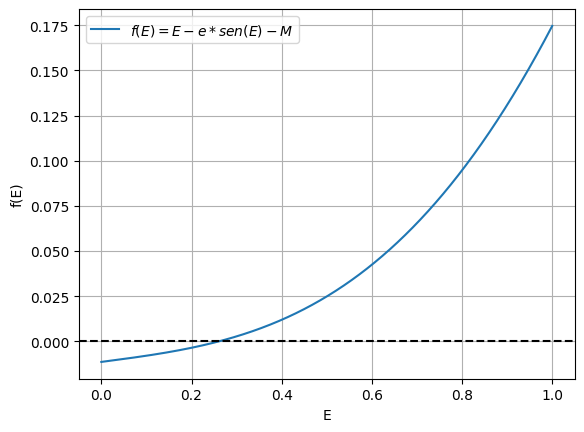

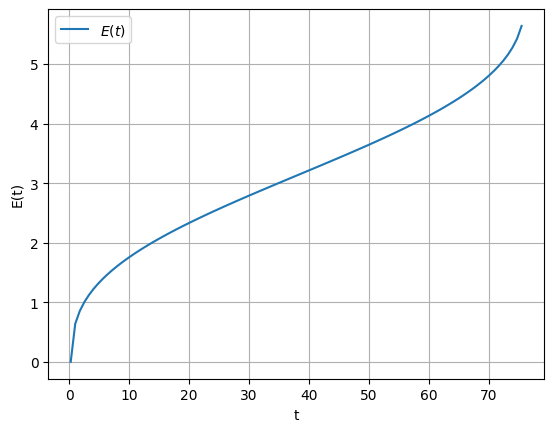

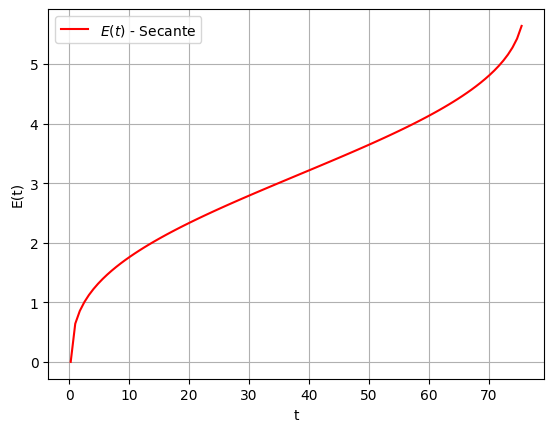

,E,f(E)
2609,0.260926,-0.000005
2610,0.261026,0.000002
2611,0.261126,0.000008


In [48]:
e = 0.9672671
t0 = 0.26
T = 75.96000

E = np.linspace(0, 1, 10000)
y = E -(0.9672671)*np.sin(E) - 0.0114
'Para generar los datos de y se hicieron las operaciones numericas'

plt.plot(E, y, label='$f(E) = E-e*sen(E) - M$')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.xlabel('E')
plt.ylabel('f(E)')
plt.grid(True)
plt.show()

print()

t = np.arange(t0, t0 +T, T/100)

M = ((2*np.pi)/T) * (t - t0)

f_E = lambda E,M: E - e*np.sin(E) - M
df_E = lambda E: 1 - e*np.cos(E)
#Método de Newton
def newton_E (f, df, M, x0 = 3, tol = 1e-9, max_n = 100):
  E_vals = []
  for Mi in M:
    x = x0
    for i in range(max_n):
      fE = f(x,Mi)
      dfE = df(x)

      if dfE == 0:
        raise ValueError('La derivada es cero, no se puede continuar.')

      x1 = x - (fE / dfE)
      if abs(x1 - x)<tol:
        break
      x = x1
    E_vals.append(x)

  return np.array(E_vals)

  raise ValueError('El método no convergió.')

E_vals = newton_E(f_E, df_E, M)

#Grafica para el método de Newton
plt.plot(t, E_vals, label='$E(t)$')
plt.legend()
plt.xlabel('t')
plt.ylabel('E(t)')
plt.grid(True)
plt.show()

print()

# Método de la secante
def secante(f, M, x0=0.26, x1=0.3, tol=1e-9, max_n=100):
    E_vals = []
    for Mi in M:
        a, b = x0, x1
        for i in range(max_n):
            fa = f(a, Mi)
            fb = f(b, Mi)
            if fb - fa == 0:
                raise ValueError(f'División por cero en secante para M={Mi}')

            c = b - fb * (b - a) / (fb - fa)

            if abs(c - b) < tol:
                break
            a, b = b, c
        else:
            raise ValueError(f'El método de la secante no convergió para M={Mi}')

        E_vals.append(c)

    return np.array(E_vals)

# Calculamos E(t) con secante
E_vals2 = secante(f_E, M)

# Graficamos E(t) obtenido con la secante
plt.plot(t, E_vals2, label='$E(t)$ - Secante', color='red')
plt.legend()
plt.xlabel('t')
plt.ylabel('E(t)')
plt.grid(True)
plt.show()


#DataFrame con la información de la gráfica del literal 1.
#La raíz se encuentra cerca de 0.26
df_kepler = pd.DataFrame({'E' : E , 'f(E)' : y})
kepler_raiz = df_kepler[np.abs(df_kepler['f(E)'])<0.00001]
kepler_raiz


#3
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

* La magnetización reducida empleando el metodo de la secante y Newton-Raphson(Muestre su resultado con 4 cifras)

* Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

0.9575
0.9575
0.9575


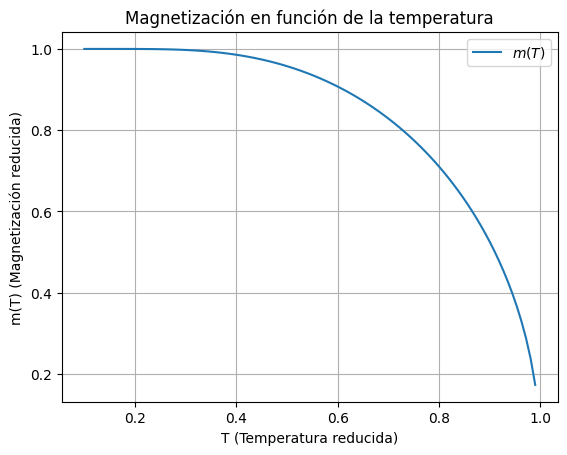

In [45]:
f = lambda m: m - np.tanh(2 * m)
df = lambda m: 1 - 2*(1/(np.cosh(2*m))**2)
g = lambda m: np.tanh(2*m)
#Método de newton
def newton_m (f, df, x0 = 0.5, tol = 1e-9, max_n = 100):
  for i in range(max_n):
    f_x0 = f(x0)
    df_x0 = df(x0)

    if df(x0) == 0:
      raise ValueError('La derivada es cero. No se puede continuar con el método')

    x1 = x0 - (f_x0/df_x0)

    if abs(x1-x0)<tol:
      return x1
    x0 = x1
  raise ValueError('El método no convergió.')

mT = newton_m(f,df)
redondeo = round(mT,4)
print(redondeo)


#Método de la secante
def sec (f, x0=0.5, x1=0.9, tol = 1e-12, max_n = 1000):
  for i in range(max_n):
    fx0 = f(x0)
    fx1 = f(x1)
    if fx1 - fx0 == 0:
      raise ValueError('La diferencia entre f(x0) y f(x1) es cero. No se puede continuar.')
    x2 = x1 - ((fx1 * (x1 - x0))/(fx1-fx0))
    if abs(x2-x1)<tol:
      return x2
    x0,x1 = x1,x2
  raise ValueError('El método no convergió.')

mT2 = sec(f)
redondeo2 = round(mT2, 4)
print(redondeo2)

#Método de punto fijo
def punto_fijo(g, x0=0.5, tol = 1e-12, max_i = 100):
  x_n = x0
  for i in range(max_i):
    x_n1 = g(x_n)
    if abs(x_n1 - x_n)<tol:
      return x_n1
    x_n = x_n1
  raise ValueError('El método no convergió.')

mT3 = punto_fijo(g)
redondeo3 = round(mT3, 4)
print(redondeo3)

#Gráfica de m(T) usando el método de la secante.
T = np.linspace(0.1, 0.99, 100)
def F(m,T):
  return m - np.tanh(m/T)

def sec2 (F, T, x0=0.5, x1=0.9, tol = 1e-12, max_n = 1000):
  for i in range(max_n):
    fx0 = F(x0,T)
    fx1 = F(x1,T)
    if fx1 - fx0 == 0:
      raise ValueError('La diferencia entre f(x0) y f(x1) es cero. No se puede continuar.')
    x2 = x1 - ((fx1 * (x1 - x0))/(fx1-fx0))
    if abs(x2-x1)<tol:
      return x2
    x0,x1 = x1,x2
  raise ValueError('El método no convergió.')

m_vals=[]

for Ti in T:
  try:
    m_T = sec2(F,Ti)
    m_vals.append(m_T)
  except ValueError:
    m_vals.append(np.nan)

plt.plot(T, m_vals, label='$m(T)$')
plt.xlabel('T (Temperatura reducida)')
plt.ylabel('m(T) (Magnetización reducida)')
plt.title('Magnetización en función de la temperatura')
plt.legend()
plt.grid(True)
plt.show()


